### Imports

In [1]:
from Garage import Augmenter
from PIL import Image

### Model initialization

In [2]:
model = Augmenter()

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/jovyan/.mlspace/envs/gen_aug/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/ddorin/generative_augme

09/09 14:13:54 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
09/09 14:13:54 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


/home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/PowerPaintModel.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(self.checkpoint

### Examples of working

In [3]:
image = Image.open("examples/image.jpg")
cat_mask = Image.open("examples/cat_mask.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

New object: dog with blue eyes and a polka dot coat., prompt: 3-year-old, 30-pound, small breed dog with blue eyes and a polka dot coat, standing on its hind legs, looking straight ahead.



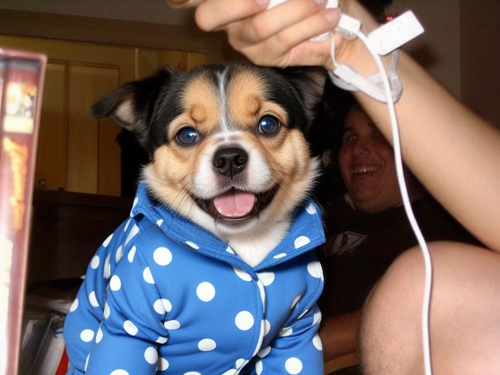

In [7]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=None,
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=3,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

New object: wolf, prompt: 15-word description: A wolf with a thick coat of fur, a bushy tail, and piercing yellow eyes.



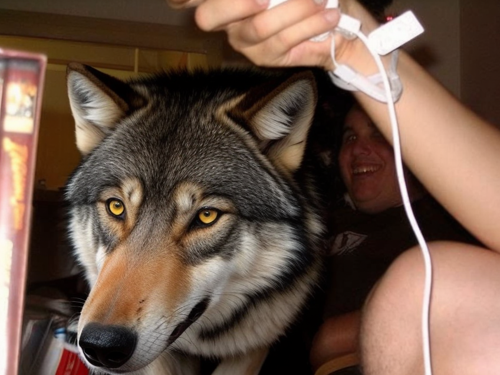

In [8]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=["wolf", "train", "tree", "rabbit", "bear", "car"],
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=42,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()